In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Employee Data Analysis Notebook



## Load the Dataset

Loading the employee dataset containing information such as salaries, departments, performance before and after training, and training completion.



In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Collab-Learning/PITP_Data Science/Datasets/employee_data_normal.csv')
print(len(df))
df.head()

100


,Employee_ID,Department,Performance_Before_Training,Performance_After_Training,Training_Completed,Salary
0,1,Marketing,88,64,1,88503
1,2,Marketing,92,95,0,82437
2,3,IT,89,95,1,84769
3,4,Finance,85,67,1,87661
4,5,Marketing,51,71,1,82651


## Task1_Normality Check on Salary Data

Generic Rule for Hypothesis Testing

p <= Alpha(0.05) Reject the null hypothesis

P > Alpha (0.05) Can't reject the null Hypothesis

Shapiro test
Null Hypothesis: Data is Normal Distributed

In [15]:
from scipy.stats import shapiro
stat, p_value = shapiro(df['Salary'])
print(f"Shapiro-Wilk Test P-value: {p_value}")

Shapiro-Wilk Test P-value: 0.5324199224728186


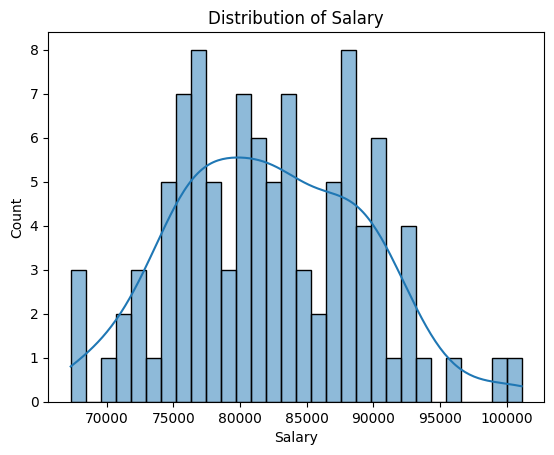

In [16]:
# Visualize the distribution of Salary using a histogram
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Salary'], kde=True, bins=30)
plt.title("Distribution of Salary")
plt.show()


In [14]:
df.groupby('Department')['Salary'].mean()

,Salary
Department,
Finance,88629.458333
HR,75129.357143
IT,85032.307692
Marketing,81071.772727


## Task2_One Sample T-test On Salary Colum

### Salary Column

In [22]:
from scipy import stats

t_statistic, p_value = stats.ttest_1samp(df['Salary'], 50000)
# Display results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 46.37702510179931
P-Value: 5.82299535554951e-69


### IT Mean Salay

In [23]:
from scipy import stats

# Perform a one-sample t-test
salary_IT = df[df['Department'] == 'IT']['Salary']
t_statistic, p_value = stats.ttest_1samp(salary_IT, 50000)
# Display results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: 35.828810934219106
P-Value: 5.202802130267052e-23


## Task3: Two-Sample Hypothesis Testing

Concept: An independent t-test compares the means of two different groups.
We use it to check if IT and HR departments have different average salaries.


In [28]:

from scipy.stats import ttest_ind

# Split the dataset by department
salary_IT = df[df['Department'] == 'IT']['Salary']
salary_HR = df[df['Department'] == 'HR']['Salary']

# Perform an independent t-test
t_stat, p_value = ttest_ind(salary_IT, salary_HR)
print(f"T-Test P-value: {p_value}")


T-Test P-value: 3.329951019818099e-11



### Interpreting the Results of the Independent T-Test

Concept: If the p-value is below 0.05, the difference between the groups is significant.


In [ ]:
if p_value < 0.05:
  print("Reject the null hypothesis")
  print("There is a significant difference in salary between IT and HR departments.")
else:
  print("Do not reject the null Hypothesis")
  print("There is no significant difference in salary between IT and HR departments.")

## Task4_Anova Testing

In [29]:
from scipy.stats import f_oneway

salary_IT = df[df['Department'] == 'IT']['Salary']
salary_HR = df[df['Department'] == 'HR']['Salary']
salary_Finance = df[df['Department'] == 'Finance']['Salary']
f_stat, p_value = f_oneway(salary_IT, salary_HR, salary_Finance)
print(f"ANOVA P-value: {p_value}")

ANOVA P-value: 1.4546863690953095e-15


### INterpret the results

In [30]:
if p_value < 0.05:
  print("Reject the null hypothesis")
  print("There is a significant difference in salary among IT, Finance, and HR departments.")
else:
  print("Do not reject the null Hypothesis")
  print("There is no significant difference in salary among IT, Finance, and departments.")

Reject the null hypothesis
There is a significant difference in salary among IT, Finance, and HR departments.


## TAsk5: Kruskal Test

In [32]:
from scipy.stats import kruskal
df1 = pd.read_csv('/content/drive/MyDrive/Collab-Learning/PITP_Data Science/Datasets/employee_data.csv')
salary_IT = df1[df1['Department'] == 'IT']['Salary']
salary_HR = df1[df1['Department'] == 'HR']['Salary']
salary_Finance = df1[df1['Department'] == 'Finance']['Salary']
k_stat, p_value = kruskal(salary_IT, salary_HR, salary_Finance)
print(f"Kruskal-Wallis Test P-value: {p_value}")

Kruskal-Wallis Test P-value: 0.12993166858670072


### Interpret the results

In [33]:
if p_value < 0.05:
  print("Reject the null hypothesis")
  print("There is a significant difference in salary among IT, Finance, and HR departments.")
else:
  print("Do not reject the null Hypothesis")
  print("There is no significant difference in salary among IT, Finance, and departments.")

Do not reject the null Hypothesis
There is no significant difference in salary among IT, Finance, and departments.


## Task 6: Testing for Homogeneity of Variance (Levene's Test)
Concept:
Levene’s test checks if the variances across groups are equal. This is another key
assumption for parametric tests like ANOVA. Perform Levene’s test to check if the
salary variances across departments are equal

In [34]:
from scipy.stats import levene
stat, p_value = levene(salary_IT, salary_HR, salary_Finance)
print(f"Levene's Test P-value: {p_value}")


Levene's Test P-value: 0.08879391081306225


### Interpret Results of Leven's Test

If the p-value is greater than 0.05, we assume that the variances are equal, and parametric
tests like ANOVA are appropriate. If the p-value is less than 0.05, the variances are
unequal, and non-parametric tests like Kruskal-Wallis should be used.

In [36]:
if p_value <= 0.05:
  print("Variance of  salary among IT, Finance, and departments are NOT equal")
else:
  print("Variance of  salary among IT, Finance, and departments are equal")

Variance of  salary among IT, Finance, and departments are equal
